In [37]:
import pandas as pd 
import os 

In [38]:
ds = pd.read_csv('en_climate_hourly_ON_6155875_01-2023_P1H.csv')

In [39]:
ds.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time (UTC),Year,Month,Day,Time (UTC),Flag,...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
0,-78.88,43.92,OSHAWA,6155875,2023-01-01 00:00,2023,1,1,00:00,NaN,...,NaN,16.1,NaN,99.05,NaN,NaN,NaN,NaN,NaN,Rain
1,-78.88,43.92,OSHAWA,6155875,2023-01-01 01:00,2023,1,1,01:00,NaN,...,NaN,16.1,NaN,99.12,NaN,NaN,NaN,NaN,NaN,NaN
2,-78.88,43.92,OSHAWA,6155875,2023-01-01 02:00,2023,1,1,02:00,NaN,...,NaN,16.1,NaN,99.15,NaN,NaN,NaN,NaN,NaN,NaN
3,-78.88,43.92,OSHAWA,6155875,2023-01-01 03:00,2023,1,1,03:00,NaN,...,NaN,16.1,NaN,99.20,NaN,NaN,NaN,NaN,NaN,NaN
4,-78.88,43.92,OSHAWA,6155875,2023-01-01 04:00,2023,1,1,04:00,NaN,...,NaN,16.1,NaN,99.31,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
columns_to_keep = ["Year", "Month", "Day", "Time (UTC)", "Temp (°C)"]

In [41]:
cleaned_ds = []

In [42]:
folder_path = r'C:\Users\Dragos\OneDrive\Documents\weather_predictor_app\newdata'

In [43]:
# Loop through all CSV files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(folder_path, filename)
        ds = pd.read_csv(file_path)
        
        # Ensure 'Time (UTC)' is in datetime format
        ds['Time (UTC)'] = pd.to_datetime(ds['Time (UTC)'])
        
        # Convert 'Time (UTC)' to 24-hour format (HH:MM)
        ds['Time (UTC)'] = ds['Time (UTC)'].dt.strftime('%H:%M')
        
        # Keep only the columns we need
        ds_cleaned = ds[columns_to_keep]
        
        # Append the cleaned dataset to the list
        cleaned_ds.append(ds_cleaned)

# Combine all cleaned datasets into one
combined_ds = pd.concat(cleaned_ds, ignore_index=True)

# Save the combined dataset to a new CSV file
combined_ds.to_csv(os.path.join(folder_path, "combined_data1.csv"), index=False)

C:\Users\Dragos\AppData\Local\Temp\ipykernel_17968\3162253208.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ds['Time (UTC)'] = pd.to_datetime(ds['Time (UTC)'])
C:\Users\Dragos\AppData\Local\Temp\ipykernel_17968\3162253208.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ds['Time (UTC)'] = pd.to_datetime(ds['Time (UTC)'])
C:\Users\Dragos\AppData\Local\Temp\ipykernel_17968\3162253208.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ds['Time (UTC)'] = pd.to_datetime(ds['Time (UTC)'])
C:\Users\Dragos\AppData\Local\Temp\ipykernel_17968\3162253208.py:8: UserWarning: C

In [45]:
data = pd.read_csv('timedata.csv')

In [46]:
data.count()

Year          17544
Month         17544
Day           17544
Time (UTC)    17544
Temp (°C)     17469
dtype: int64

In [47]:
data.duplicated().sum()

0

<Axes: xlabel='Time (UTC)'>

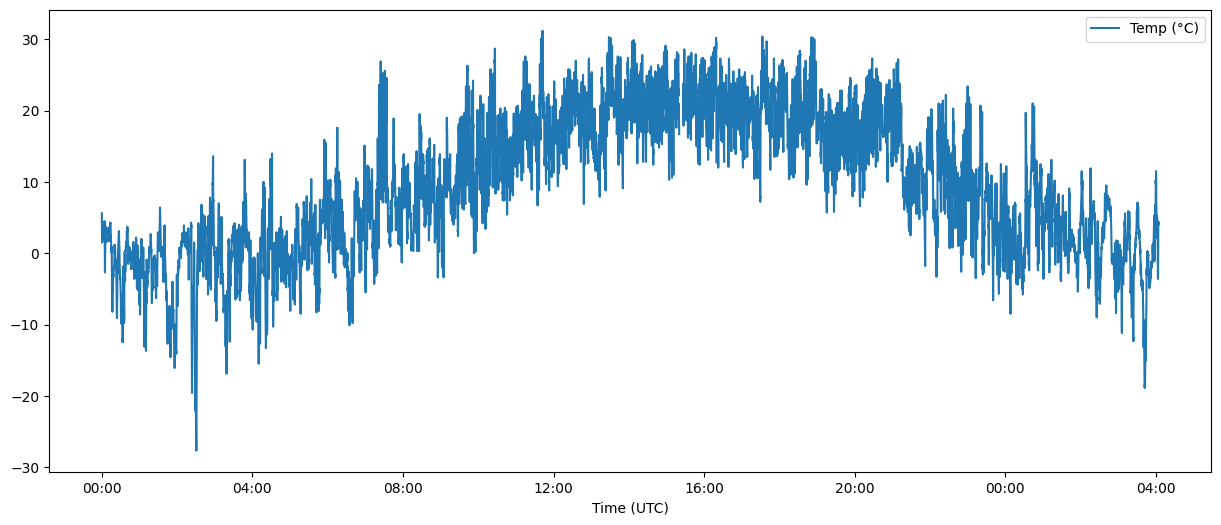

In [48]:
data.plot(x='Time (UTC)', y='Temp (°C)', figsize=(15, 6))